# Perceptron

A **Perceptron** is a simple artificial neural network unit that takes multiple inputs, performs a weighted sum of these inputs, and applies a threshold function to produce an output.

It's essentially a basic building block of neural networks, serving as a simplified model of a biological neuron.

<img src="https://drive.google.com/uc?id=18Ar9x38STGTjuRCzJe90Oha6cDmFhE3J" width="400">

**Inputs**: A neuron takes multiple inputs, often represented as x
1
​
 ,x
2
​
 ,…,x
n
​
 , each of which is associated with a weight w
1
​
 ,w
2
​
 ,…,w
n
​
 . A bias term b is usually added as well.

**Weighted Sum**: The neuron calculates a weighted sum of the inputs z, using the formula:

$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

**Activation Function**: The neuron then applies an activation function to this weighted sum to introduce non-linearity into the model.
$$
a = f(z)
$$

Common activation functions include the sigmoid, ReLU, and tanh functions.

**Output**: The result, α  is the neuron's output, which is passed to the next layer in the network.

## Perceptron implementation using TensorFlow on synthetic dataset

Lets create synthetic classification data using [`sklearn.datasets.make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) and train a perceptron classifier model for 50 epochs.







In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/Users/vikramadithyapabba/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


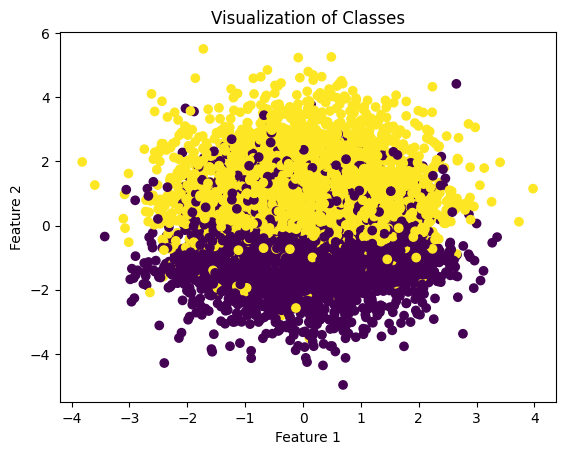

In [6]:
# Visualize the dataset

import matplotlib.pyplot as plt

plt.scatter(X[:, 4], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Classes')
plt.show()

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Define and train the perceptron
perceptron = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(20,))
])

/Users/vikramadithyapabba/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Important Arguments**
* `Dense` layer represents the perceptron
* `sigmoid` activation function is used to produce output values between 0 and 1.

In [9]:
# Compilation and training
perceptron.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
perceptron_history = perceptron.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)


**Important Arguments**

* `Adam optimizer` is used to update weights during training. It maintains moving averages of the first and second moments of gradients.
* `Binary_crossentropy` cost function is used to measure the model's error. It calculates the difference between the predicted probabilities and the true binary labels. It penalizes incorrect predictions more heavily.
* `accuracy` is used to validate the performace of the model.

In [10]:
# Evaluate on the test set
perceptron_loss, perceptron_accuracy = perceptron.evaluate(X_test_scaled, y_test, verbose=0)

Perceptron Test Accuracy: 0.8935
Perceptron Test Loss: 0.2711


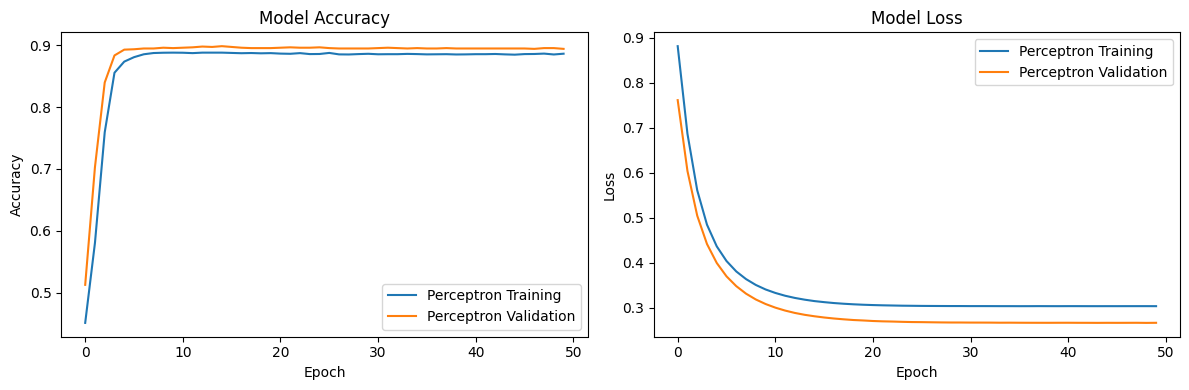

In [11]:
print(f"Perceptron Test Accuracy: {perceptron_accuracy:.4f}")
print(f"Perceptron Test Loss: {perceptron_loss:.4f}")


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)

plt.plot(perceptron_history.history['accuracy'], label='Perceptron Training')
plt.plot(perceptron_history.history['val_accuracy'], label='Perceptron Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(perceptron_history.history['loss'], label='Perceptron Training')
plt.plot(perceptron_history.history['val_loss'], label='Perceptron Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



---



# Neural Networks

A **neural network** is created by connecting several nodes so that the output of some nodes serves as the input
to others.
In a neural network, the layers of nodes are organized into three main types: the input layer, the hidden
layer, and the output layer. The input layer consists of nodes that represent the input features of the data,
and it also includes special bias units that always output a value of +1. <br><br> The hidden layer is where the
network processes the information through weights and biases to learn patterns. This layer’s nodes are not
directly observed in the data but play a crucial role in transforming the inputs into meaningful outputs.
Finally, the output layer provides the final prediction or result of the network. In our example, there are 3
input nodes, 3 hidden nodes, and 1 output node.

<img src="https://drive.google.com/uc?id=1ZNF4e_DWy3hZhZRKKB7orJPudD8kOx4t" width=400>

**Basic Architecture:**
* **Input Layer:** The first layer receives the input data, which can be images, text, numerical data, or any other suitable format.
* **Hidden Layers:** These layers process the input data and extract relevant features. They can be multiple layers, each with a different number of neurons.
* **Output Layer:** The final layer produces the output, which can be a classification, regression, or other desired result.

**Key Components:**
* **Neurons:** The fundamental units of a neural network, each representing a simple computational unit.
* **Weights:** Numerical values that determine the strength of connections between neurons.
* **Biases:** Additional parameters that adjust the output of a neuron.
Activation Functions: Non-linear functions that introduce complexity and enable the network to learn complex patterns.

## Neural Networks implementation using TensorFlow on synthetic dataset

A neural network with 3 hidden layers is defined and trained for 50 epochs.



In [12]:
# Define and train the neural network
neural_network = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(20,)), # 1 hidden layer with 64 neurons
    tf.keras.layers.Dense(32, activation='relu'), # 1 hidden layer with 32 neurons
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 neuron
])

In [13]:
neural_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_history = neural_network.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)


In [14]:
# Evaluate on test set
nn_loss, nn_accuracy = neural_network.evaluate(X_test_scaled, y_test, verbose=0)


Neural Network Test Accuracy: 0.9155
Neural Network Test Loss: 0.2595


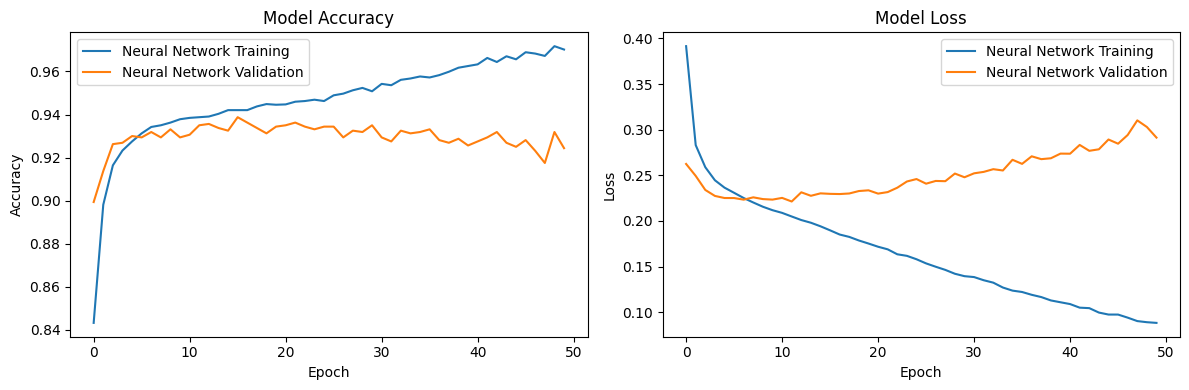

In [15]:
print(f"Neural Network Test Accuracy: {nn_accuracy:.4f}")
print(f"Neural Network Test Loss: {nn_loss:.4f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(nn_history.history['accuracy'], label='Neural Network Training')
plt.plot(nn_history.history['val_accuracy'], label='Neural Network Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(nn_history.history['loss'], label='Neural Network Training')
plt.plot(nn_history.history['val_loss'], label='Neural Network Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Performance Comparison

1. **Model Complexity**: The neural network's superior performance can be attributed to its higher complexity. With multiple layers, it can learn more intricate patterns in the data that a single-layer perceptron might miss.

2. **Generalization**: The neural network's ability to achieve both higher accuracy and lower loss on the test set indicates better generalization to unseen data.

3. **Non-linear Decision Boundary**: The neural network can create non-linear decision boundaries, allowing it to separate classes more effectively in complex datasets.

4. **Feature Extraction**: The hidden layers in the neural network can automatically learn and extract relevant features from the input data, which contributes to its improved performance.

5. **Marginal Improvement**: While the neural network performs better, the perceptron still achieves a respectable accuracy of 89.30%. This suggests that the classification task might not be extremely complex, as even a simple model performs well.


The neural network demonstrates superior performance in both accuracy and loss metrics. However, the perceptron's performance is also quite good, indicating that the problem may be largely linearly separable. The choice between these models would depend on factors such as:

- The complexity of the dataset
- Computational resources available
- The need for interpretability (perceptrons are generally more interpretable)
- The required level of accuracy for the specific application

For tasks where marginal improvements in accuracy are crucial, the neural network would be the preferred choice. However, if simplicity and faster training are priorities, and the slight decrease in accuracy is acceptable, the perceptron could be a suitable option.

# Neural Networks implementation on `MNIST` data using TensorFlow

## MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) database is a widely used dataset in the field of machine learning,
specifically for image classification tasks. It consists of 60,000 training images and 10,000 testing images, each 28x28 grayscale images of **handwritten digits** from 0 to 9. ([learn more](https://colah.github.io/posts/2014-10-Visualizing-MNIST/))

<img src='https://miro.medium.com/v2/resize:fit:1280/format:webp/1*B9pCFLFsx50PGaCYy2U_sw.gif' width=300>

## Problem
Now the idea is to input each handwritten digit to the neural network and classify what that image of the hand written digit signifies.

<img src='https://miro.medium.com/v2/resize:fit:1160/format:webp/0*u5-PcKYVfUE5s2by.gif' width=400>

As the above image suggests,
* Each image of the handwritten digit is **flattened** first. That is,
  * **Image shape:** (28, 28, 1)
  * **After Flattening:** (784, 1)
  * We are simply multiplying the first 2 dimensions of the image.
* Now this flattened image is passed down to the feed forward neural network through the hidden layers and finally outputs the result between 0 to 9.





## Load and preprocess the dataset

In [3]:
# Importing necessary libraries

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

/Users/vikramadithyapabba/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# 1. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Normalization

The pixel values are **normalized** to the range
[0,1] by dividing by 255.

* **Without normalization**, the network would see input features (pixel values) that vary significantly in scale (some very high, others low).
* When features have large values, they can cause larger weight updates during backpropagation, leading to a very erratic optimization process.

In [5]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
# Flatten the images to 1D vectors (28*28 = 784 features)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


### Converting labels to one hot vector?

The digits 0,1,2,…,9 are categorical (i.e., different classes), not ordinal. If you use the raw label numbers (e.g., 0, 1, 2, etc.) directly, the model may assume there's a numerical relationship between them, like 9 is greater than 0 or 2 is less than 3. This is not true in classification tasks.

One-hot encoding prevents the model from assigning importance or relationships based on the magnitude of the class labels, by creating an independent binary vector for each class.

**One hot encoding representation:**

<img src='https://codecraft.tv/courses/tensorflowjs/neural-networks/mnist-training-data/img/exports/5.mnist.001.jpeg' width=500>

Here:

* The length of the vector is equal to the number of classes (10 in the case of MNIST).
* The value 1 is placed in the position corresponding to the true class (9 in this case), and all other positions are 0.


In [23]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


## Building the model

We shall be building a neural network using `tf.keras.Sequential`.
* **Input:** 784 flattened features of the image
* **Hidden layer 1:** 128 neurons
* **Hidden layer 2:** 64 neurons
* **Output:** 10 neurons

In [24]:
# 2. Build the feedforward neural network model
model = models.Sequential([
    layers.Input(shape=(28 * 28,)),  # Input layer (28x28 = 784 flattened image)
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    layers.Dense(64, activation='relu'),  # Another fully connected layer with 64 neurons
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 classes
])


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the model

In [26]:
# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [27]:
# 4. Train the model

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8503 - loss: 0.5277 - val_accuracy: 0.9643 - val_loss: 0.1302
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9624 - loss: 0.1317 - val_accuracy: 0.9687 - val_loss: 0.1081
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9751 - loss: 0.0855 - val_accuracy: 0.9762 - val_loss: 0.0833
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9803 - loss: 0.0645 - val_accuracy: 0.9763 - val_loss: 0.0838
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9856 - loss: 0.0470 - val_accuracy: 0.9775 - val_loss: 0.0818
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9879 - loss: 0.0380 - val_accuracy: 0.9785 - val_loss: 0.0727
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.9790 - val_loss: 0.0816
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9919 - loss: 0.0251 - val_accuracy: 0.

## Evaluating the model

In [28]:
# 5. Evaluate the model

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9729 - loss: 0.1029
Test accuracy: 0.9776999950408936


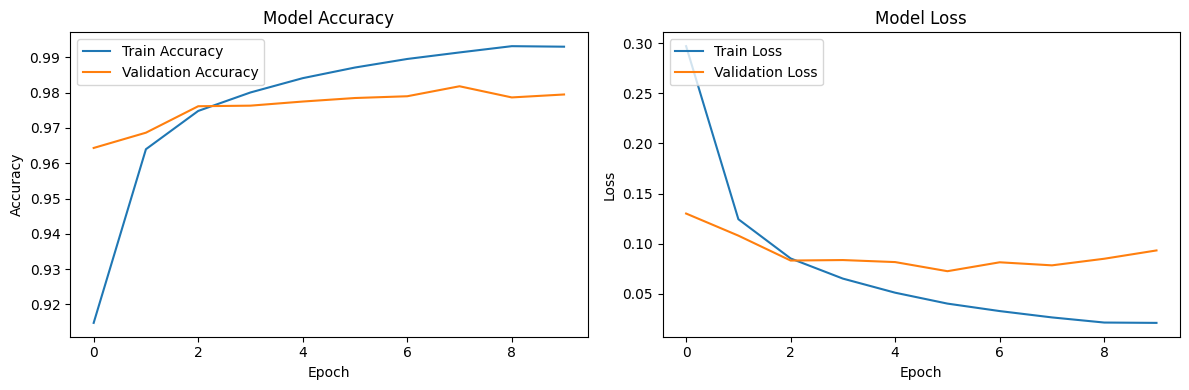

In [29]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
